In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pydataset import data
import os
import env
import acquire 
import prepare

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [2]:
# acquire titanic data using acquire.py function

titan = acquire.get_titanic_data()
titan.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
# use function to clean the data. from prepare.py

titan = prepare.prep_titanic(titan)
titan.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
0,0,3,male,1,0,7.2500,Southampton,0,0,1,0,0,1,0
1,1,1,female,1,0,71.2833,Cherbourg,0,1,0,1,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,1,0,0,0,1,0
3,1,1,female,1,0,53.1000,Southampton,0,1,0,0,0,1,0
4,0,3,male,0,0,8.0500,Southampton,1,0,1,0,0,1,0


In [4]:
titan.drop(['sex', 'embark_town'], axis=1, inplace=True)
titan.head()

,survived,pclass,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
0,0,3,1,0,7.2500,0,0,1,0,0,1,0
1,1,1,1,0,71.2833,0,1,0,1,0,0,0
2,1,3,0,0,7.9250,1,1,0,0,0,1,0
3,1,1,1,0,53.1000,0,1,0,0,0,1,0
4,0,3,0,0,8.0500,1,0,1,0,0,1,0


In [5]:
# Splitting my data using a pre-made function in the prepare.py file
train, val, test = prepare.split_data(df=titan, target='survived')

In [6]:
train.shape, val.shape, test.shape

((498, 12), (214, 12), (179, 12))

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [7]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
583,0,1,0,0,40.1250,1,0,1,1,0,0,0
165,1,3,0,2,20.5250,0,0,1,0,0,1,0
50,0,3,4,1,39.6875,0,0,1,0,0,1,0
259,1,2,0,1,26.0000,0,1,0,0,0,1,0
306,1,1,0,0,110.8833,1,1,0,1,0,0,0


In [8]:
# Look into what count, nulls, and data types it has.
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   survived                  498 non-null    int64  
 1   pclass                    498 non-null    int64  
 2   sibsp                     498 non-null    int64  
 3   parch                     498 non-null    int64  
 4   fare                      498 non-null    float64
 5   alone                     498 non-null    int64  
 6   sex_female                498 non-null    uint8  
 7   sex_male                  498 non-null    uint8  
 8   embark_town_Cherbourg     498 non-null    uint8  
 9   embark_town_Queenstown    498 non-null    uint8  
 10  embark_town_Southampton   498 non-null    uint8  
 11  embark_town_Southhampton  498 non-null    uint8  
dtypes: float64(1), int64(5), uint8(6)
memory usage: 30.2 KB


In [9]:
# Finding most common value of target. Most people be dead. 

train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [10]:
train['baseline'] = 0
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton,baseline
583,0,1,0,0,40.1250,1,0,1,1,0,0,0,0
165,1,3,0,2,20.5250,0,0,1,0,0,1,0,0
50,0,3,4,1,39.6875,0,0,1,0,0,1,0,0
259,1,2,0,1,26.0000,0,1,0,0,0,1,0,0
306,1,1,0,0,110.8833,1,1,0,1,0,0,0,0


In [11]:
# baseline has an accruacy of 62%

accuracy_score(train.survived, train.baseline)

0.6164658634538153

<div class="alert alert-block alert-success" >
<b> Baseline: <b>
<br> Most people did not survive. Baseline accuracy is ~62%
<br> 

<div Baseline >

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

Make the Stuff
1. Create train,val, and test XY variables to drop target
2. Make the tree of life; clf = DecisionTreeClassifier
3. Make it fit
4. Make predictions
5. Check score(accuracy)
6. Look at big tree
7. Compare clf.score(train) with clf.score(val)


In [12]:
train.drop('baseline', axis=1, inplace=True)

In [13]:
X_train = train.drop(['survived'], axis=1)
y_train = train.survived

X_val = val.drop(['survived'], axis=1)
y_val = val.survived

X_test = test.drop(['survived'], axis=1)
y_test = test.survived

In [14]:
X_train.head()

,pclass,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
583,1,0,0,40.1250,1,0,1,1,0,0,0
165,3,0,2,20.5250,0,0,1,0,0,1,0
50,3,4,1,39.6875,0,0,1,0,0,1,0
259,2,0,1,26.0000,0,1,0,0,0,1,0
306,1,0,0,110.8833,1,1,0,1,0,0,0


In [15]:
X_val.head()

,pclass,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
610,3,1,5,31.2750,0,1,0,0,0,1,0
424,3,1,1,20.2125,0,0,1,0,0,1,0
568,3,0,0,7.2292,1,0,1,1,0,0,0
334,1,1,0,133.6500,0,1,0,0,0,1,0
101,3,0,0,7.8958,1,0,1,0,0,1,0


In [16]:
# Make tree of life

clf = DecisionTreeClassifier(max_depth=4, random_state=42)

In [17]:
# Make it fit

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [18]:
# Check them scores

clf.score(X_train, y_train)

0.8253012048192772

In [19]:
clf.score(X_val, y_val)

0.7850467289719626

[Text(0.5446428571428571, 0.9, 'X[6] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(0.2857142857142857, 0.7, 'X[0] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(0.14285714285714285, 0.5, 'X[3] <= 28.856\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(0.07142857142857142, 0.3, 'X[3] <= 28.231\ngini = 0.133\nsamples = 42\nvalue = [3, 39]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21428571428571427, 0.3, 'X[2] <= 1.5\ngini = 0.038\nsamples = 52\nvalue = [1, 51]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(0.25, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.42857142857142855, 0.5, 'X[3] <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]'),
 Text(0.35714285714285715, 0.3, 'X[8] <= 0.5\ngini = 0.476\nsamples = 69\nvalue = [27, 42]'),
 Text(0.32142857142857145, 0.1, 'gin

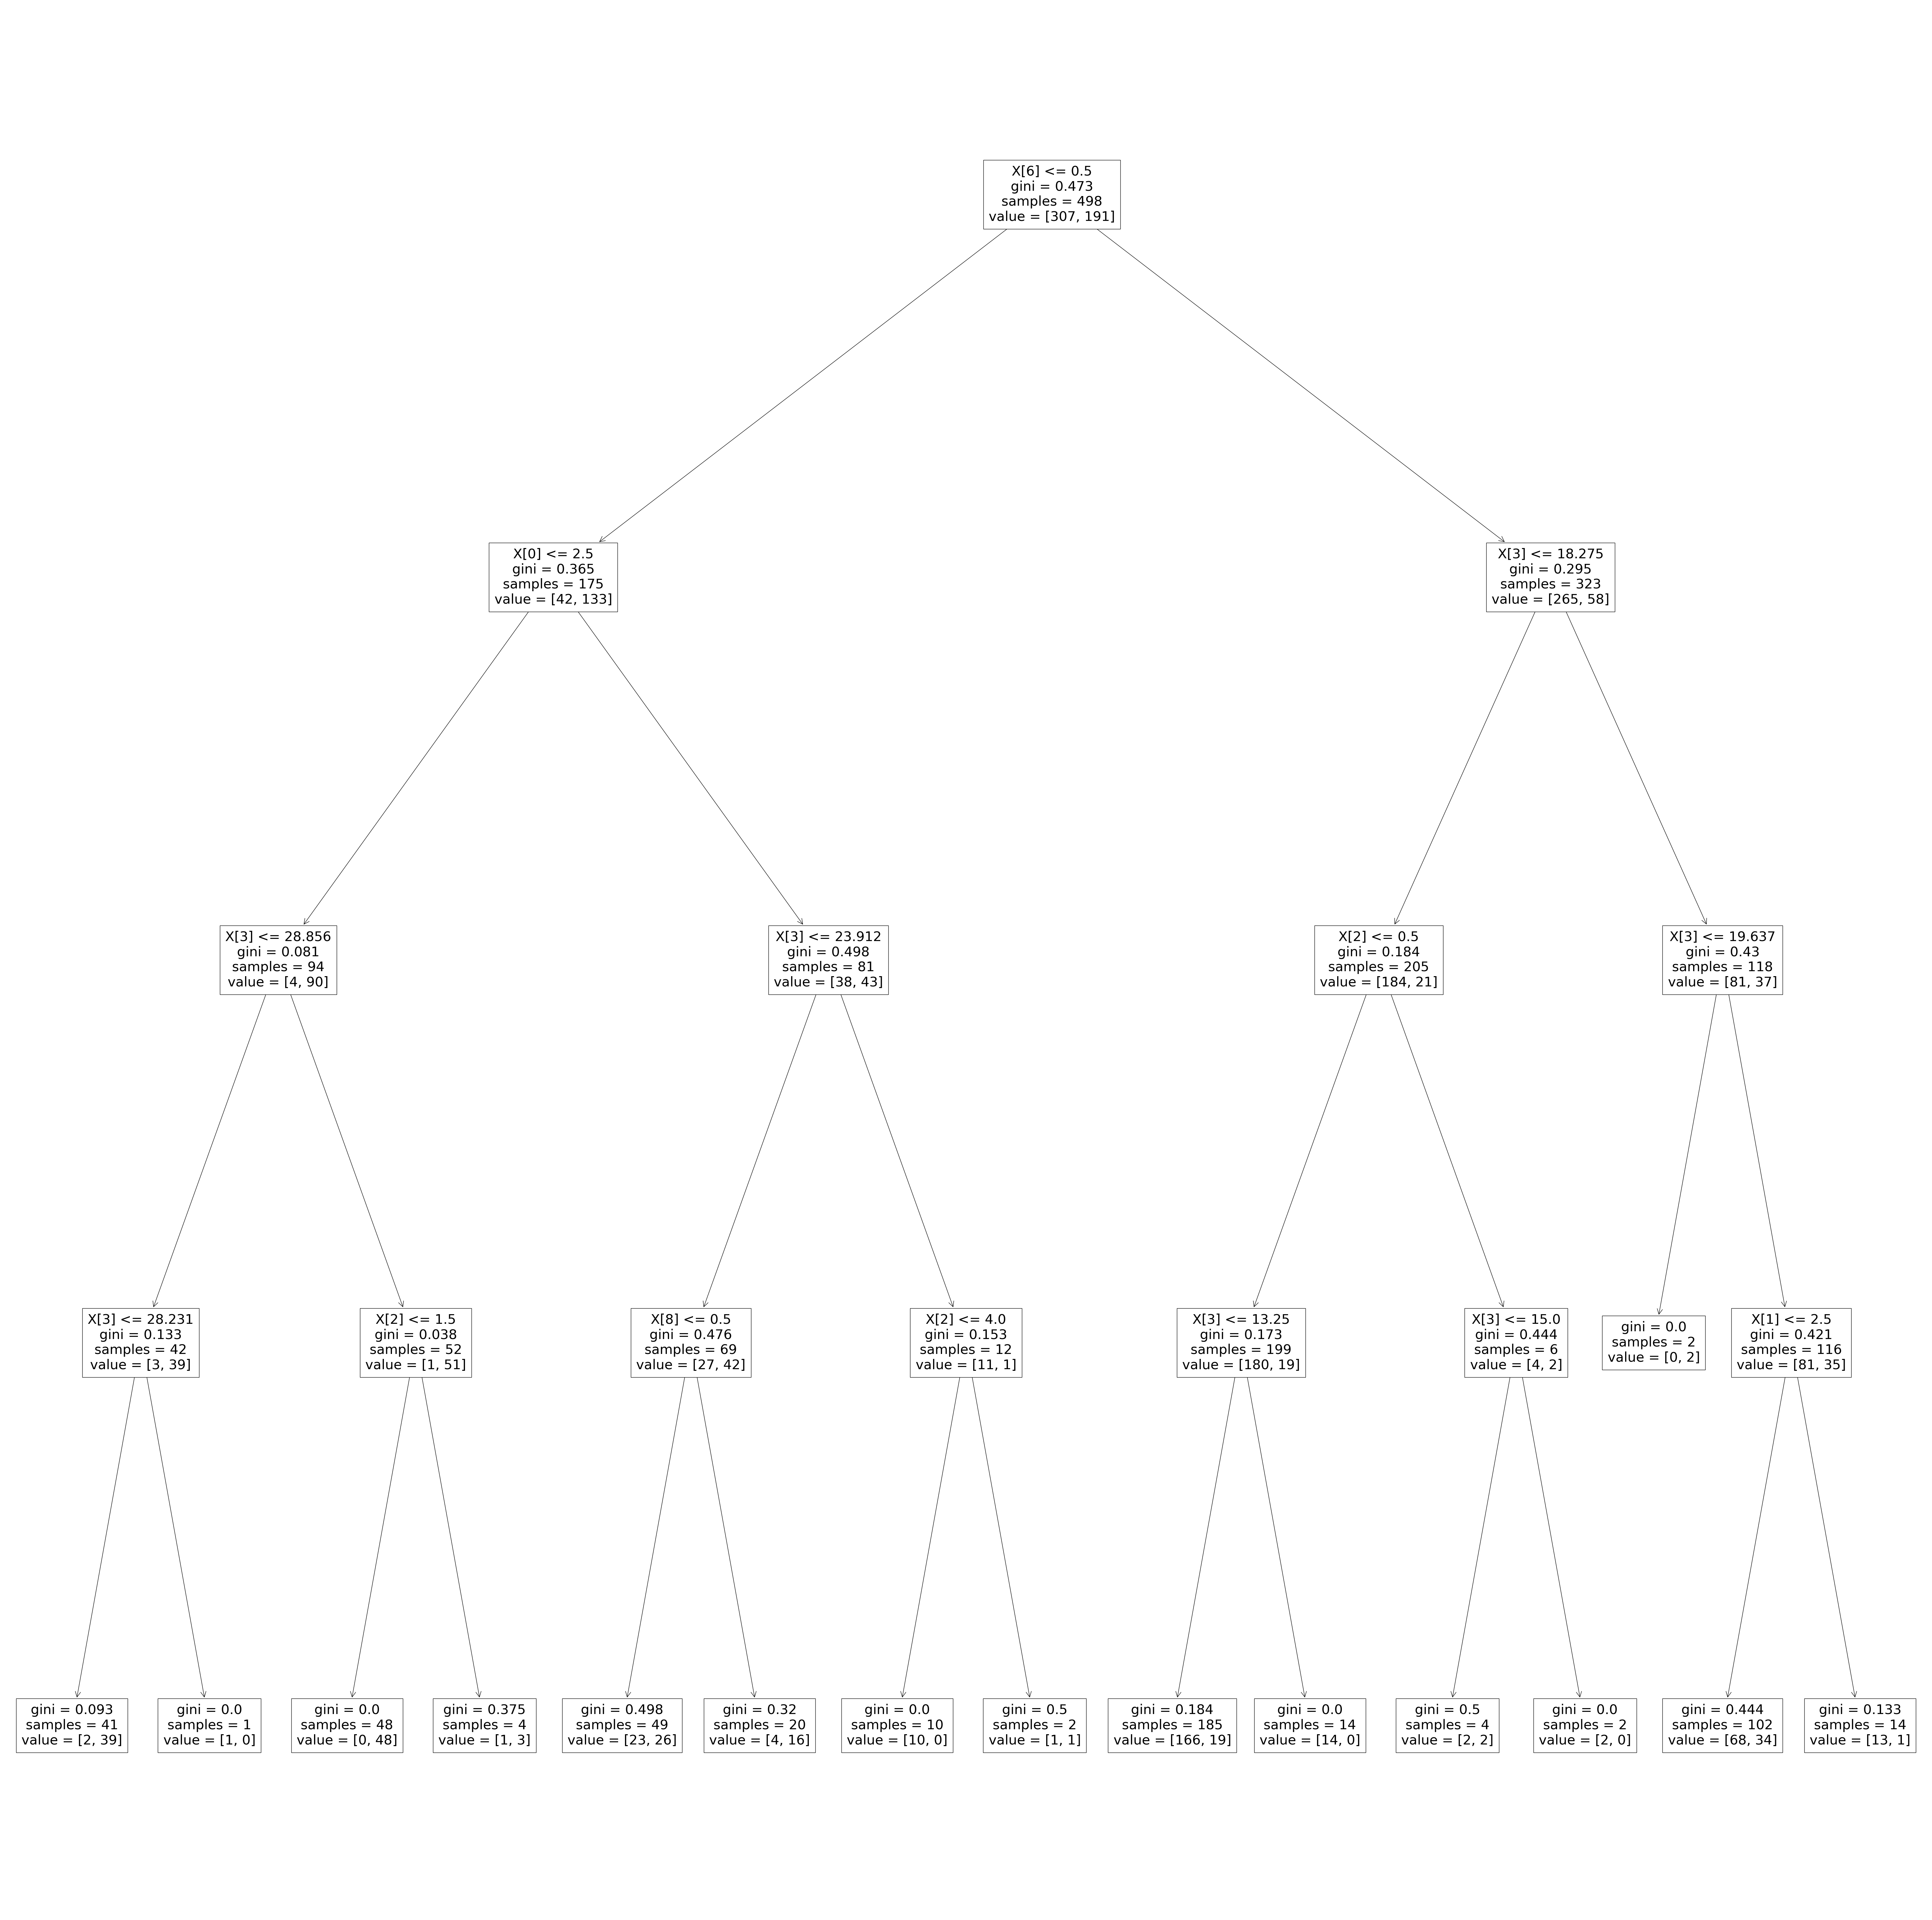

In [20]:
# plot the tree

from sklearn import tree

plot = clf.fit(X_train, y_train)


plt.figure(figsize = (80,80))

tree.plot_tree(plot)

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [21]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,embark_town_Southhampton
583,0,1,0,0,40.1250,1,0,1,1,0,0,0
165,1,3,0,2,20.5250,0,0,1,0,0,1,0
50,0,3,4,1,39.6875,0,0,1,0,0,1,0
259,1,2,0,1,26.0000,0,1,0,0,0,1,0
306,1,1,0,0,110.8833,1,1,0,1,0,0,0


In [22]:
print(clf.score(X_train, y_train))
print(clf.score(X_val, y_val))

0.8253012048192772
0.7850467289719626


In [23]:
# Creating y-predictions using X_val dataframe
y_preds = clf.predict(X_val)

In [24]:
print(confusion_matrix(y_val, y_preds))

[[115  17]
 [ 29  53]]


In [64]:
plot.confusion_matrix(clf, X_train, y_train)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'confusion_matrix'

In [25]:
# Classification Report
print(classification_report(y_val, y_preds))


              precision    recall  f1-score   support

           0       0.80      0.87      0.83       132
           1       0.76      0.65      0.70        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.78      0.79      0.78       214



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [26]:
# Accuracy

print(accuracy_score(y_val, y_preds))
print(clf.score(X_val, y_val))


0.7850467289719626
0.7850467289719626


In [27]:
print(confusion_matrix(y_val, y_preds))

[[115  17]
 [ 29  53]]


In [28]:
tn = 115
fp = 17
fn = 29
tp = 53

tn+fp+fn+tp





214

In [65]:
tp, fp, fn, tp = confusion_matrix(y_train, y_preds).ravel()

ValueError: Found input variables with inconsistent numbers of samples: [498, 214]

In [29]:
val.shape

(214, 12)

In [ ]:
negative_rate = TN + FP
positive_rate = FN + TP

In [66]:
# For Loop made in class review
for i in range(1, 21):
    trees = DecisionTreeClassifier(max_depth=i, random_state=123)
    trees = trees.fit(X_train, y_train)
    y_preds = trees.predict(X_train)
    report = classification_report(y_train, y_preds, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.820433    0.760000  0.799197    0.790217      0.797255
recall       0.863192    0.696335  0.799197    0.779764      0.799197
f1-score     0.841270    0.726776  0.799197    0.784023      0.797358
support    307.000000  191.000000  0.799197  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.828829    0.812121  0.823293    0.820475      0.822421
recall       0.899023    0.701571  0.823293    0.800297      0.823293
f1-score     

In [70]:
metrics = []

for i in range(1, 21):
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)
    tree = tree.fit(X_train, y_train)
    in_sample_accuracy = tree.score(X_train, y_train)
    out_of_sample_accuracy = tree.score(X_val, y_val)
    
    output = {"max_depth": i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
    
    metrics.append(output)

df = pd.DataFrame(metrics)
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.799197,0.761682,0.037515
1,2,0.799197,0.761682,0.037515
2,3,0.823293,0.785047,0.038246
3,4,0.825301,0.785047,0.040254
4,5,0.837349,0.761682,0.075667
5,6,0.859438,0.771028,0.088410
6,7,0.863454,0.771028,0.092426
7,8,0.897590,0.757009,0.140581
8,9,0.911647,0.766355,0.145291
9,10,0.923695,0.766355,0.157340


In [30]:
# Precision

precision_score(y_val, y_preds)


0.7571428571428571

In [31]:
# Recall

recall_score(y_val, y_preds)


0.6463414634146342

In [32]:
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       132
           1       0.76      0.65      0.70        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.78      0.79      0.78       214



### 5. Run through steps 2-4 using a different max_depth value.

Make the Stuff
1. Create train,val, and test XY variables to drop target
2. Make the tree of life; clf = DecisionTreeClassifier
3. Make it fit
4. Make predictions
5. Check score(accuracy)
6. Look at big tree
7. Compare clf.score(train) with clf.score(val)

In [33]:
clf2 = DecisionTreeClassifier(max_depth=10, random_state=42)

In [34]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [43]:
# Predictions for X_train. This will be used for the confusion matrix.

y_pred = clf2.predict(X_train)
y_pred[0:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [44]:
confusion_matrix(y_train, y_pred)

array([[304,   3],
       [ 35, 156]])

In [35]:
clf2.score(X_train, y_train)

0.9236947791164659

In [36]:
# plot the tree

plot = clf2.fit(X_train, y_train)


plt.figure(figsize = (100,100))

tree.plot_tree(plot)

[Text(0.4888930722891566, 0.9545454545454546, 'X[6] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(0.24209337349397592, 0.8636363636363636, 'X[0] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(0.10843373493975904, 0.7727272727272727, 'X[3] <= 28.856\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(0.08433734939759036, 0.6818181818181818, 'X[3] <= 28.231\ngini = 0.133\nsamples = 42\nvalue = [3, 39]'),
 Text(0.07228915662650602, 0.5909090909090909, 'X[2] <= 0.5\ngini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(0.060240963855421686, 0.5, 'X[4] <= 0.5\ngini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(0.03614457831325301, 0.4090909090909091, 'X[3] <= 22.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.024096385542168676, 0.3181818181818182, 'X[9] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.012048192771084338, 0.22727272727272727, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03614457831325301, 0.22727272727272727, 'g

In [37]:
# Comparing accuracy score between train data and validate data. Model is looking overfitted. 

print(clf2.score(X_train, y_train))
print(clf2.score(X_val, y_val))

0.9236947791164659
0.7616822429906542


In [40]:
y_pred_prob = clf2.predict_proba(X_train)
y_pred_prob[0:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [47]:
# Accuracy
clf2.score(X_val, y_val)

0.7616822429906542

In [46]:
# Making predictions using X_val. This will be used in the confusion matrix; classification_report (actual, predictions)

y_pred = clf2.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       132
           1       0.72      0.61      0.66        82

    accuracy                           0.76       214
   macro avg       0.75      0.73      0.74       214
weighted avg       0.76      0.76      0.76       214



### 6. Which model performs better on your in-sample data?

In [50]:
print('Model 1')
print(clf.score(X_train, y_train))
print(clf.score(X_val, y_val))
print('--------------\n')
print('Model 2')
print(clf2.score(X_train, y_train))
print(clf2.score(X_val, y_val))

Model 1
0.8253012048192772
0.7850467289719626
--------------

Model 2
0.9236947791164659
0.7616822429906542


<div class="alert alert-block alert-success" >
<b> Model 2 performs better, but it is overfitted. <b>


### 7. Which model performs best on your out-of-sample data, the validate set?

In [51]:
print('Model 1')
print(clf.score(X_train, y_train))
print(clf.score(X_val, y_val))
print('--------------\n')
print('Model 2')
print(clf2.score(X_train, y_train))
print(clf2.score(X_val, y_val))

Model 1
0.8253012048192772
0.7850467289719626
--------------

Model 2
0.9236947791164659
0.7616822429906542


<div class="alert alert-block alert-success" >
<b> Model 1 performs better and its accuracy is closer to the train(in-sample) dataset.. <b>


In [54]:
telco_df = acquire.get_telco_data()
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [56]:
telco_df = prepare.prep_telco(telco_df)

In [57]:
telco_df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract_type,internet_service_type,payment_type,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,One year,DSL,Mailed check,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,Month-to-month,DSL,Mailed check,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,Month-to-month,Fiber optic,Electronic check,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,Month-to-month,Fiber optic,Electronic check,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,Month-to-month,Fiber optic,Mailed check,0,0,1,0,0,0,1


In [58]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                7043 non-null   object 
 1   senior_citizen                        7043 non-null   int64  
 2   partner                               7043 non-null   object 
 3   dependents                            7043 non-null   object 
 4   tenure                                7043 non-null   int64  
 5   phone_service                         7043 non-null   object 
 6   multiple_lines                        7043 non-null   object 
 7   online_security                       7043 non-null   object 
 8   online_backup                         7043 non-null   object 
 9   device_protection                     7043 non-null   object 
 10  tech_support                          7043 non-null   object 
 11  streaming_tv     

In [59]:
telco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
contract_type_One year,7043.0,0.209144,0.406726,0.00,0.0,0.00,0.00,1.00
contract_type_Two year,7043.0,0.240664,0.427517,0.00,0.0,0.00,0.00,1.00
internet_service_type_Fiber optic,7043.0,0.439585,0.496372,0.00,0.0,0.00,1.00,1.00
internet_service_type_None,7043.0,0.216669,0.412004,0.00,0.0,0.00,0.00,1.00
payment_type_Credit card (automatic),7043.0,0.216101,0.411613,0.00,0.0,0.00,0.00,1.00
payment_type_Electronic check,7043.0,0.335794,0.472301,0.00,0.0,0.00,1.00,1.00
payment_type_Mailed check,7043.0,0.228880,0.420141,0.00,0.0,0.00,0.00,1.00


In [61]:
telco_df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [63]:
# Most people did not churn. That will be my baseline.

telco_df['baseline'] = 'No'
telco_df.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,internet_service_type,payment_type,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,baseline
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,DSL,Mailed check,1,0,0,0,0,0,1,No
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,DSL,Mailed check,0,0,0,0,0,0,1,No
